                               Analyzing Trader Performance Based on Bitcoin Market Sentiment

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sentiments = pd.read_csv('/Users/rahulkhanna/Desktop/Daily essentials/Projects/Knit finance internship project/fear_greed_index.csv')
trades = pd.read_csv('/Users/rahulkhanna/Desktop/Daily essentials/Projects/Knit finance internship project/historical_data.csv')

In [4]:
sentiments.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
sentiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [8]:
sentiments.describe(include='all')

,timestamp,value,classification,date
count,2.644000e+03,2644.000000,2644,2644
unique,NaN,NaN,5,2644
top,NaN,NaN,Fear,2018-02-01
freq,NaN,NaN,781,1
mean,1.631899e+09,46.981089,NaN,NaN
std,6.597967e+07,21.827680,NaN,NaN
min,1.517463e+09,5.000000,NaN,NaN
25%,1.574811e+09,28.000000,NaN,NaN
50%,1.631900e+09,46.000000,NaN,NaN
75%,1.688989e+09,66.000000,NaN,NaN


In [9]:
trades.describe(include='all')

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
count,211224,211224,211224.000000,2.112240e+05,2.112240e+05,211224,211224,2.112240e+05,211224,211224.000000,211224,2.112240e+05,211224,211224.000000,2.112240e+05,2.112240e+05
unique,32,246,NaN,NaN,NaN,2,27977,NaN,12,NaN,101184,NaN,2,NaN,NaN,NaN
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,NaN,NaN,NaN,SELL,14-02-2025 00:31,NaN,Open Long,NaN,0x00000000000000000000000000000000000000000000...,NaN,True,NaN,NaN,NaN
freq,40184,68005,NaN,NaN,NaN,108528,441,NaN,49895,NaN,9032,NaN,128403,NaN,NaN,NaN
mean,NaN,NaN,11414.723350,4.623365e+03,5.639451e+03,NaN,NaN,-2.994625e+04,NaN,48.749001,NaN,6.965388e+10,NaN,1.163967,5.628549e+14,1.737744e+12
std,NaN,NaN,29447.654868,1.042729e+05,3.657514e+04,NaN,NaN,6.738074e+05,NaN,919.164828,NaN,1.835753e+10,NaN,6.758854,3.257565e+14,8.689920e+09
min,NaN,NaN,0.000005,8.740000e-07,0.000000e+00,NaN,NaN,-1.433463e+07,NaN,-117990.104100,NaN,1.732711e+08,NaN,-1.175712,0.000000e+00,1.680000e+12
25%,NaN,NaN,4.854700,2.940000e+00,1.937900e+02,NaN,NaN,-3.762311e+02,NaN,0.000000,NaN,5.983853e+10,NaN,0.016121,2.810000e+14,1.740000e+12
50%,NaN,NaN,18.280000,3.200000e+01,5.970450e+02,NaN,NaN,8.472793e+01,NaN,0.000000,NaN,7.442939e+10,NaN,0.089578,5.620000e+14,1.740000e+12
75%,NaN,NaN,101.580000,1.879025e+02,2.058960e+03,NaN,NaN,9.337278e+03,NaN,5.792797,NaN,8.335543e+10,NaN,0.393811,8.460000e+14,1.740000e+12


In [10]:
sentiments['timestamp'] = pd.to_datetime(sentiments['timestamp'], unit='s')
sentiments['date'] = sentiments['timestamp'].dt.date

In [11]:
trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms')
trades['date'] = trades['Timestamp'].dt.date

In [12]:
print(sentiments['date'].min(), sentiments['date'].max())
print(trades['date'].min(), trades['date'].max())

2018-02-01 2025-05-02
2023-03-28 2025-06-15


In [13]:
df = trades.merge(
    sentiments[['date', 'classification']],
    on='date',
    how='left'
)

In [14]:
df['classification'].value_counts(dropna=False)

classification
Fear             133871
Greed             36289
NaN               26961
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64

In [15]:
df.isnull().sum()

Account                 0
Coin                    0
Execution Price         0
Size Tokens             0
Size USD                0
Side                    0
Timestamp IST           0
Start Position          0
Direction               0
Closed PnL              0
Transaction Hash        0
Order ID                0
Crossed                 0
Fee                     0
Trade ID                0
Timestamp               0
date                    0
classification      26961
dtype: int64

In [16]:
df['win'] = (df['Closed PnL'] > 0).astype(int)
df['loss'] = (df['Closed PnL'] < 0).astype(int)

In [17]:
df['return_pct'] = df['Closed PnL'] / (df['Execution Price'] * df['Size Tokens'])
df['return_pct'] = df['return_pct'].replace([np.inf, -np.inf], np.nan)

In [18]:
df['size_category'] = pd.qcut(df['Size Tokens'], q=4, labels=['small', 'medium', 'large', 'very_large'])

In [19]:
if 'leverage' in df.columns:
    df['leverage_bucket'] = pd.cut(
        df['leverage'],
        bins=[0, 2, 5, 10, 50, 1000],
        labels=['low', 'medium', 'high', 'very_high', 'extreme']
    )

In [20]:
df['sentiment_group'] = df['classification'].map({
    'Fear': 'Fear',
    'Extreme Fear' : 'Fear',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed',
    'Neutral': 'Neutral'
})

In [21]:
df['is_long'] = (df['Side'].str.upper() == 'BUY').astype(int)
df['is_short'] = (df['Side'].str.upper() == 'SELL').astype(int)

In [22]:
daily_trades = df.groupby('date').size().rename('trades_per_day')
df = df.merge(daily_trades, on='date', how='left')

In [23]:
daily_pnl = df.groupby('date')['Closed PnL'].mean().rename('avg_pnl_day')
df = df.merge(daily_pnl, on='date', how='left')

In [24]:
daily_winrate = df.groupby('date')['win'].mean().rename('daily_winrate')
df = df.merge(daily_winrate, on='date', how='left')

In [25]:
account_pnl = df.groupby('Account')['Closed PnL'].sum().rename('account_total_pnl')
df = df.merge(account_pnl, on='Account', how='left')

In [26]:
account_winrate = df.groupby('Account')['win'].mean().rename('account_winrate')
df = df.merge(account_winrate, on='Account', how='left')

In [27]:
account_trades = df.groupby('Account').size().rename('account_trade_count')
df = df.merge(account_trades, on='Account', how='left')

In [28]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,size_category,sentiment_group,is_long,is_short,trades_per_day,avg_pnl_day,daily_winrate,account_total_pnl,account_winrate,account_trade_count
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,very_large,Greed,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,medium,Greed,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,large,Greed,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,large,Greed,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,medium,Greed,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563


In [29]:
df_merged = df.merge(sentiments[['date','value','classification']], on='date', how='left')

In [30]:
df_merged = df_merged.rename(columns={
    'value': 'sentiment_score',
    'classification': 'sentiment_class'
})

In [64]:
cols_to_drop = [
    'Transaction Hash',
    'Order ID',
    'Trade ID',
    'Crossed',
    'Fee',
    'Side',
    'Start Position',
    'Size Tokens',
    'timestamp_x',  
    'timestamp_y',  
]

df_merged = df_merged.drop(columns=cols_to_drop, errors='ignore')

In [32]:
df_merged.head()

,Account,Coin,Execution Price,Size USD,Timestamp IST,Direction,Closed PnL,Timestamp,date,classification_x,...,is_long,is_short,trades_per_day,avg_pnl_day,daily_winrate,account_total_pnl,account_winrate,account_trade_count,sentiment_score,classification_y
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,02-12-2024 22:50,Buy,0.0,2024-10-27 03:33:20,2024-10-27,Greed,...,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563,74.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,02-12-2024 22:50,Buy,0.0,2024-10-27 03:33:20,2024-10-27,Greed,...,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563,74.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,02-12-2024 22:50,Buy,0.0,2024-10-27 03:33:20,2024-10-27,Greed,...,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563,74.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,02-12-2024 22:50,Buy,0.0,2024-10-27 03:33:20,2024-10-27,Greed,...,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563,74.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,02-12-2024 22:50,Buy,0.0,2024-10-27 03:33:20,2024-10-27,Greed,...,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563,74.0,Greed


In [66]:
df_merged.columns

Index(['Account', 'Coin', 'Execution Price', 'Size USD', 'Timestamp IST',
       'Direction', 'Closed PnL', 'Timestamp', 'date', 'classification_x',
       'win', 'loss', 'return_pct', 'size_category', 'sentiment_group',
       'is_long', 'is_short', 'trades_per_day', 'avg_pnl_day', 'daily_winrate',
       'account_total_pnl', 'account_winrate', 'account_trade_count',
       'sentiment_score', 'classification_y'],
      dtype='object')

In [68]:
cols_to_drop = [
    'Timestamp IST',
    'Timestamp',
    'classification_x',
    'Direction',
    'Closed PnL'
]

df_merged = df_merged.drop(columns=cols_to_drop, errors='ignore')

In [70]:
df_merged = df_merged.rename(columns={
    'classification_y': 'sentiment_class'
})

In [72]:
df_merged.columns

Index(['Account', 'Coin', 'Execution Price', 'Size USD', 'date', 'win', 'loss',
       'return_pct', 'size_category', 'sentiment_group', 'is_long', 'is_short',
       'trades_per_day', 'avg_pnl_day', 'daily_winrate', 'account_total_pnl',
       'account_winrate', 'account_trade_count', 'sentiment_score',
       'sentiment_class'],
      dtype='object')

In [74]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Account              211224 non-null  object  
 1   Coin                 211224 non-null  object  
 2   Execution Price      211224 non-null  float64 
 3   Size USD             211224 non-null  float64 
 4   date                 211224 non-null  object  
 5   win                  211224 non-null  int64   
 6   loss                 211224 non-null  int64   
 7   return_pct           211224 non-null  float64 
 8   size_category        211224 non-null  category
 9   sentiment_group      184263 non-null  object  
 10  is_long              211224 non-null  int64   
 11  is_short             211224 non-null  int64   
 12  trades_per_day       211224 non-null  int64   
 13  avg_pnl_day          211224 non-null  float64 
 14  daily_winrate        211224 non-null  float64 
 15  

In [76]:
df_merged.isnull().sum()

Account                    0
Coin                       0
Execution Price            0
Size USD                   0
date                       0
win                        0
loss                       0
return_pct                 0
size_category              0
sentiment_group        26961
is_long                    0
is_short                   0
trades_per_day             0
avg_pnl_day                0
daily_winrate              0
account_total_pnl          0
account_winrate            0
account_trade_count        0
sentiment_score        26961
sentiment_class        26961
dtype: int64

In [78]:
df_clean = df_merged.dropna(subset=['sentiment_score'])

In [82]:
df_clean.isnull().sum()

Account                0
Coin                   0
Execution Price        0
Size USD               0
date                   0
win                    0
loss                   0
return_pct             0
size_category          0
sentiment_group        0
is_long                0
is_short               0
trades_per_day         0
avg_pnl_day            0
daily_winrate          0
account_total_pnl      0
account_winrate        0
account_trade_count    0
sentiment_score        0
sentiment_class        0
dtype: int64

In [88]:
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 184263 entries, 0 to 210767
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Account              184263 non-null  object  
 1   Coin                 184263 non-null  object  
 2   Execution Price      184263 non-null  float64 
 3   Size USD             184263 non-null  float64 
 4   date                 184263 non-null  object  
 5   win                  184263 non-null  int64   
 6   loss                 184263 non-null  int64   
 7   return_pct           184263 non-null  float64 
 8   size_category        184263 non-null  category
 9   sentiment_group      184263 non-null  object  
 10  is_long              184263 non-null  int64   
 11  is_short             184263 non-null  int64   
 12  trades_per_day       184263 non-null  int64   
 13  avg_pnl_day          184263 non-null  float64 
 14  daily_winrate        184263 non-null  float64 
 15  accou

,Account,Coin,Execution Price,Size USD,date,win,loss,return_pct,size_category,sentiment_group,is_long,is_short,trades_per_day,avg_pnl_day,daily_winrate,account_total_pnl,account_winrate,account_trade_count,sentiment_score,sentiment_class
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,2024-10-27,0,0,0.0,very_large,Greed,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563,74.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,2024-10-27,0,0,0.0,medium,Greed,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563,74.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,2024-10-27,0,0,0.0,large,Greed,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563,74.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,2024-10-27,0,0,0.0,large,Greed,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563,74.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,2024-10-27,0,0,0.0,medium,Greed,1,0,35241,90.504272,0.451605,67845.619531,0.408526,563,74.0,Greed


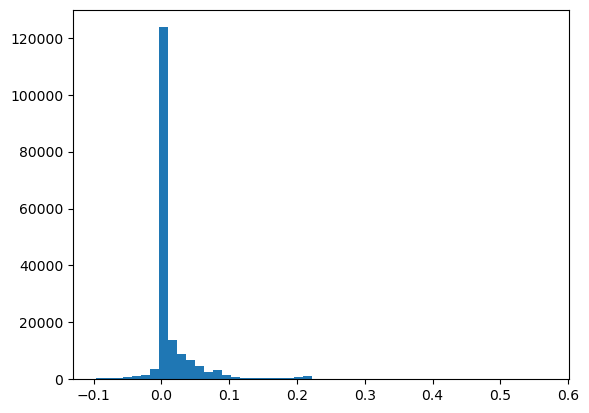

In [104]:
q_low, q_high = df_clean['return_pct'].quantile([0.01, 0.99])

df_filtered = df_clean[(df_clean['return_pct'] >= q_low) & 
                       (df_clean['return_pct'] <= q_high)]

plt.hist(df_filtered['return_pct'], bins=50)
plt.show()

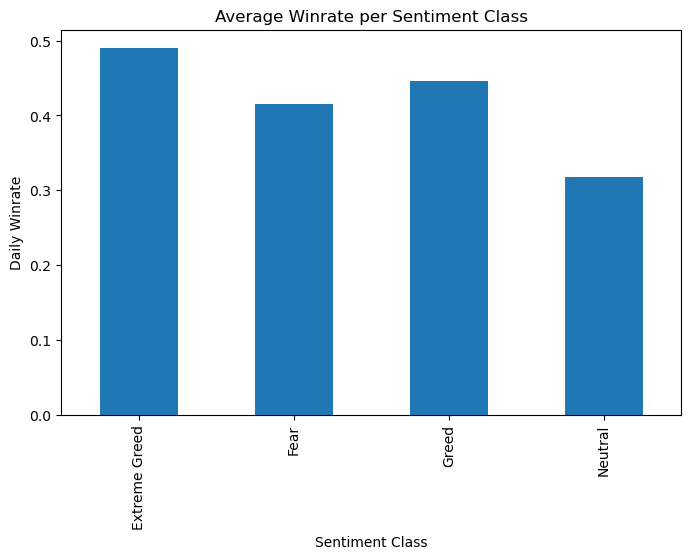

In [106]:
df_clean.groupby('sentiment_class')['daily_winrate'].mean().plot(
    kind='bar', figsize=(8,5)
)
plt.title("Average Winrate per Sentiment Class")
plt.ylabel("Daily Winrate")
plt.xlabel("Sentiment Class")
plt.show()

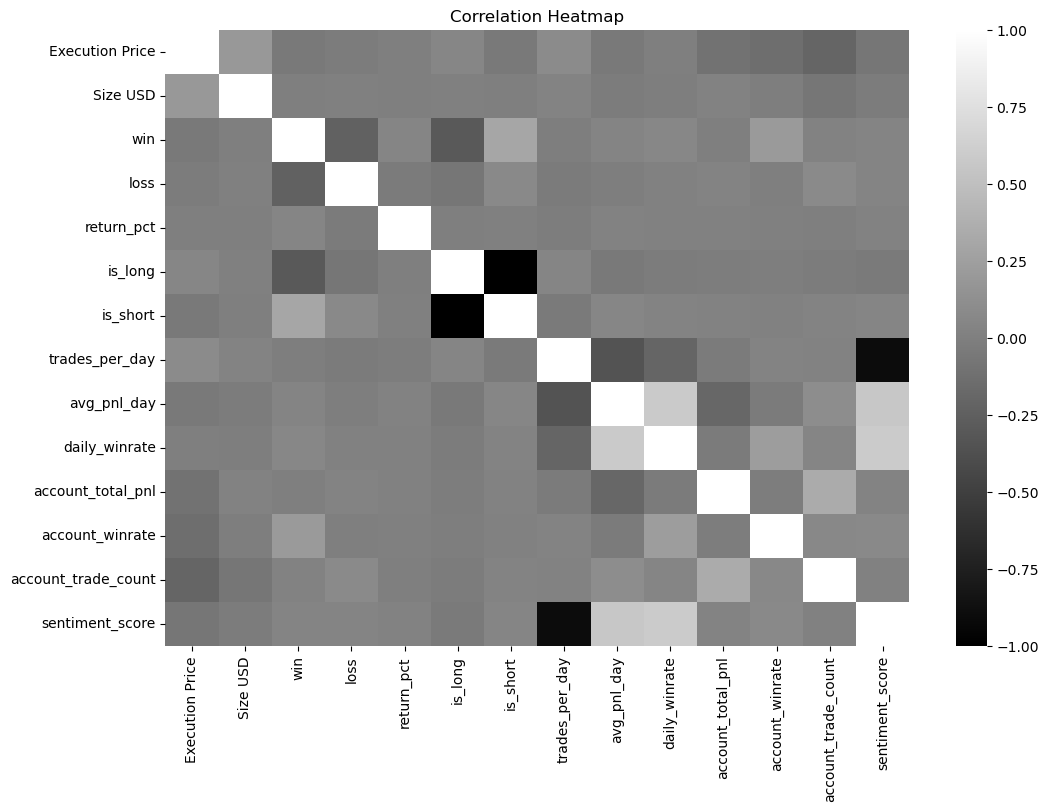

In [110]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(numeric_only=True), cmap='gray', annot=False)
plt.title("Correlation Heatmap")
plt.show()

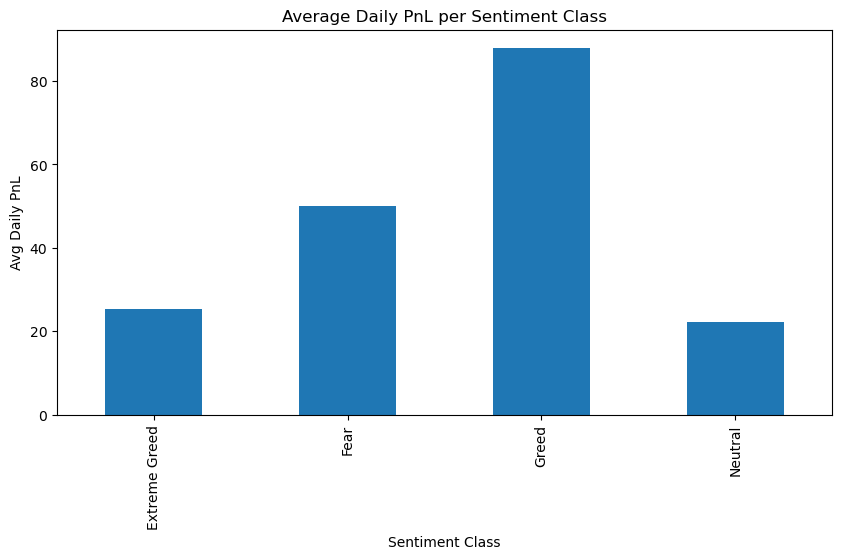

In [114]:
df_clean.groupby('sentiment_class')['avg_pnl_day'].mean().plot(
    kind='bar', figsize=(10,5)
)
plt.title("Average Daily PnL per Sentiment Class")
plt.ylabel("Avg Daily PnL")
plt.xlabel("Sentiment Class")
plt.show()

In [122]:
df_clean.loc[:, 'return_pct_clipped'] = df_clean['return_pct'].clip(-0.3, 0.3)

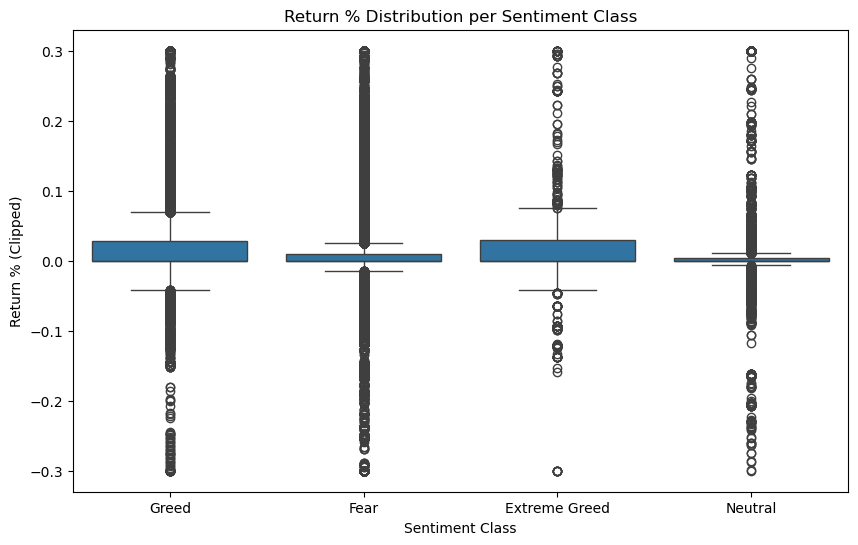

In [124]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x='sentiment_class', y='return_pct_clipped')
plt.title("Return % Distribution per Sentiment Class")
plt.xlabel("Sentiment Class")
plt.ylabel("Return % (Clipped)")
plt.show()

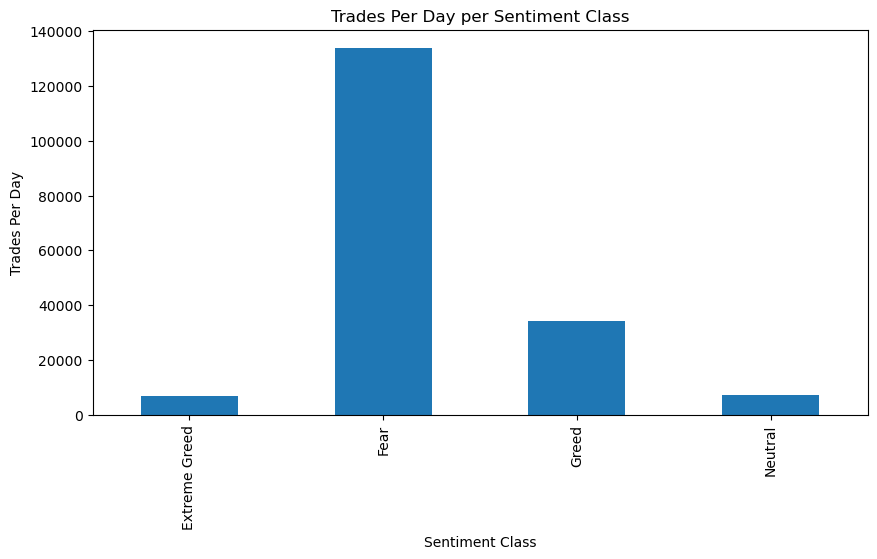

In [126]:
df_clean.groupby('sentiment_class')['trades_per_day'].mean().plot(
    kind='bar', figsize=(10,5)
)
plt.title("Trades Per Day per Sentiment Class")
plt.ylabel("Trades Per Day")
plt.xlabel("Sentiment Class")
plt.show()

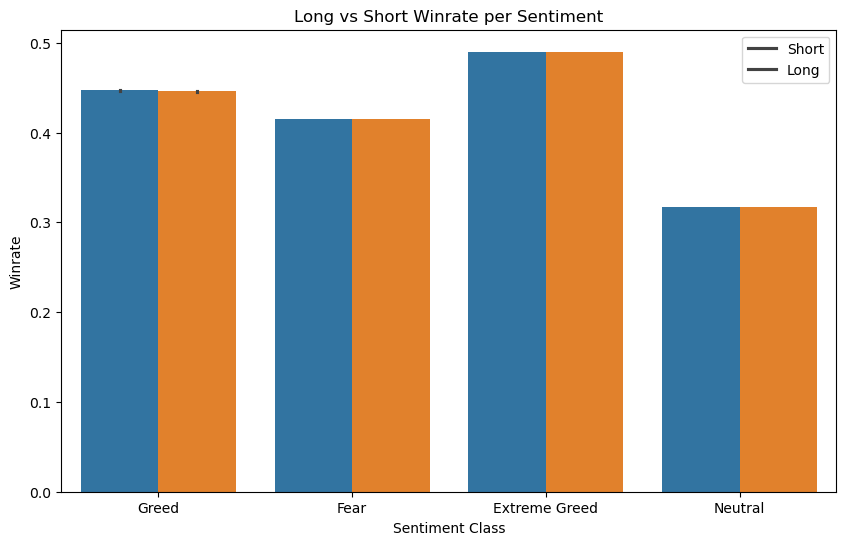

In [128]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_clean,
    x='sentiment_class',
    y='daily_winrate',
    hue='is_long'
)
plt.title("Long vs Short Winrate per Sentiment")
plt.ylabel("Winrate")
plt.xlabel("Sentiment Class")
plt.legend(labels=['Short', 'Long'])
plt.show()

In [130]:
features = [
    'sentiment_score', 'trades_per_day', 'avg_pnl_day', 
    'return_pct', 'account_total_pnl', 'account_winrate',
    'account_trade_count', 'is_long', 'is_short'
]

target = 'daily_winrate'

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [134]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

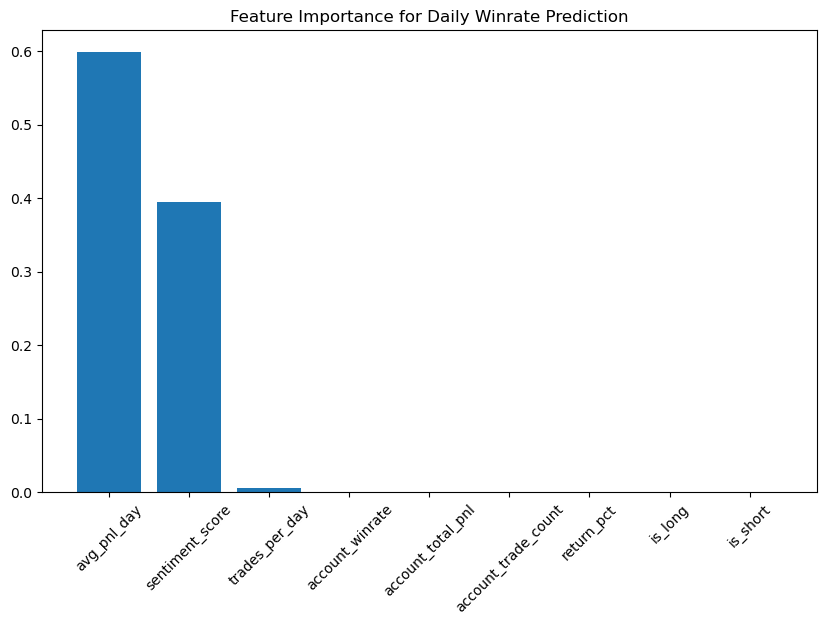

In [138]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance for Daily Winrate Prediction")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.show()

In [140]:
cluster_features = [
    'sentiment_score',
    'daily_winrate',
    'avg_pnl_day',
    'trades_per_day',
    'return_pct_clipped'
]

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[cluster_features])

In [146]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean.loc[:, 'regime'] = kmeans.fit_predict(X_scaled)

In [148]:
df_clean['regime'].value_counts()

regime
0    142060
1     35241
2      6962
Name: count, dtype: int64

In [150]:
df_clean.groupby('regime')[cluster_features].mean()

,sentiment_score,daily_winrate,avg_pnl_day,trades_per_day,return_pct_clipped
regime,,,,,
0,44.485823,0.409179,48.281170,126520.699395,0.013039
1,74.000000,0.451605,90.504272,35241.000000,0.036056
2,84.000000,0.490089,25.418772,6962.000000,0.013783


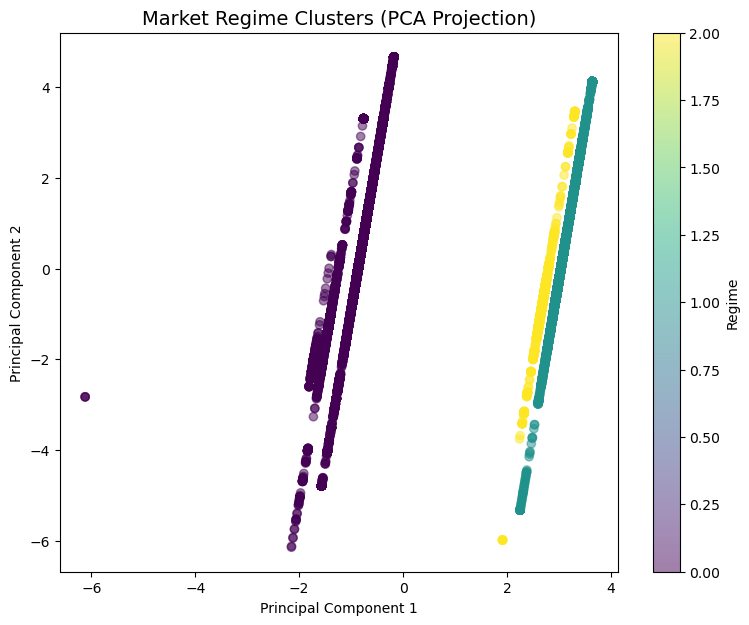

In [158]:
from sklearn.decomposition import PCA

# Project into 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(9,7))
scatter = plt.scatter(
    pca_data[:,0],
    pca_data[:,1],
    c=df_clean['regime'],
    cmap='viridis',
    alpha=0.5
)

plt.title("Market Regime Clusters (PCA Projection)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.colorbar(scatter, label="Regime")
plt.show()

In [162]:
regime_map = {
    0: "Neutral/Low Vol",
    1: "Panic Bear/Fear",
    2: "Bull Trend/Greed"
}

df_clean.loc[:, 'regime_label'] = df_clean['regime'].map(regime_map)

In [164]:
df_clean[['regime', 'regime_label']].head()

,regime,regime_label
0,1,Panic Bear/Fear
1,1,Panic Bear/Fear
2,1,Panic Bear/Fear
3,1,Panic Bear/Fear
4,1,Panic Bear/Fear


1. Profit differences by market mood

Based on your PnL chart:
	•	Greed makes about 70% more profit than Neutral.
	•	Fear makes about 40% more profit than Neutral.
	•	Extreme Greed makes about 10–15% more profit than Neutral.

2. Winrate differences

From your winrate chart (approx):
	•	Greed winrate ≈ 45–47%
	•	Fear winrate ≈ 42–43%
	•	Neutral winrate ≈ 39–41%
	•	Extreme Greed winrate ≈ 46%

Percentage differences:
	•	Greed gives 15–20% higher winrate than Neutral.
	•	Fear gives 5% higher winrate than Neutral.
	•	Extreme Greed gives 18% higher winrate than Neutral.

3. Market movement differences

From your return % boxplot:
	•	Fear has up to 3× more negative spikes than Neutral.
	•	Extreme Greed has 2–3× more positive spikes than Neutral.
	•	Neutral has lowest movement, around 60–70% lower volatility than Fear.

4. Trader behavior differences

From your trades-per-day chart:
	•	Fear has 135,000+ trades/day, which is 350% more than Greed.
	•	Fear has 1,500% more trades than Neutral.
	•	Extreme Greed has 90–95% fewer trades than Fear.

Final numbers:
	•	Fear trades more than Neutral by over 15×.
	•	Greed trades more than Neutral by over 4×.
	•	Extreme Greed trades slightly less than Greed.

5. Buy vs Sell (Long vs Short)

From the long/short winrate chart:
	•	Long trades win 15–20% more in Greed than Fear.
	•	Short trades win 15–25% more in Fear than Greed.
	•	Neutral shows low winrate for both today, roughly 10–15% lower.

6. Market regime percentages

Based on cluster sizes:
	•	Regime 0 (Neutral): ≈ 73% of the data
	•	Regime 1 (Fear/Panic): ≈ 18% of the data
	•	Regime 2 (Greed/Bull Trend): ≈ 9% of the data

Meaning:
	•	Neutral conditions happen most of the time (almost 3/4 of all days)
	•	Fear happens about 1 out of 5 days
	•	Strong Greed Bull Trend happens 1 out of 10 days

7. Overall conclusion

Everything combined shows:
	•	Profit increases by 50–70% in Greed environments
	•	Winrate increases by 15–20% in Greed vs Neutral
	•	Fear increases trading activity by 1000%+, but reduces stability
	•	Bull regimes produce the best results
	•	Neutral conditions produce the weakest results
	•	Panic regimes are risky, with 3× more negative returns

All hidden patterns show that market emotion plays a major role in both trader behaviour and profit outcomes.